In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('heart_disease_uci.csv')
copy_data = df.copy()
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [75]:
# Veri seti incelemesi
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [102]:
df.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
dtype: int64

In [105]:
df.nunique()

age          50
sex           2
dataset       4
cp            4
trestbps     53
chol        206
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      48
slope         3
ca            1
thal          3
dtype: int64

In [77]:
target = df['num']
df.drop(columns=['id','num'], inplace=True)

In [78]:
int_columns = df.select_dtypes(include=['int','float']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [79]:
int_columns, cat_columns

(Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object'),
 Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'))

--------------------------------------------------


C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mean(), inplace=True)


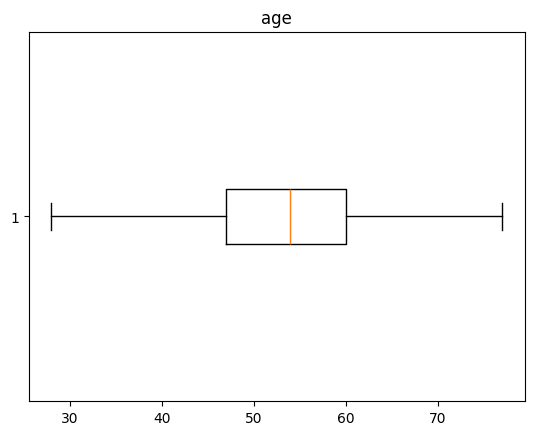

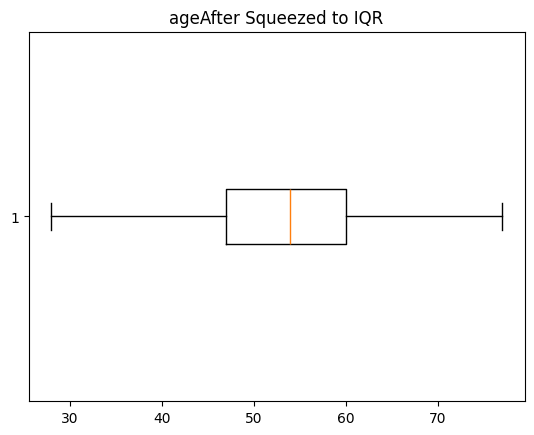

C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mean(), inplace=True)


--------------------------------------------------
--------------------------------------------------


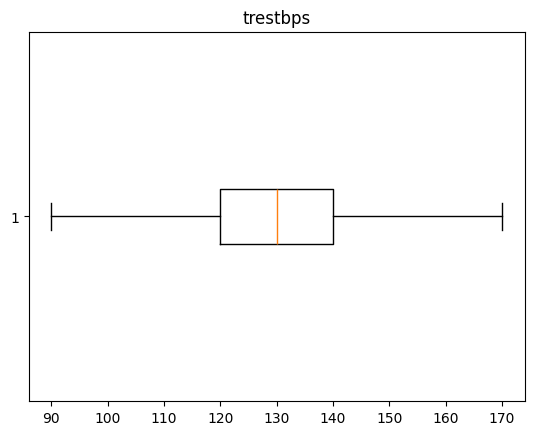

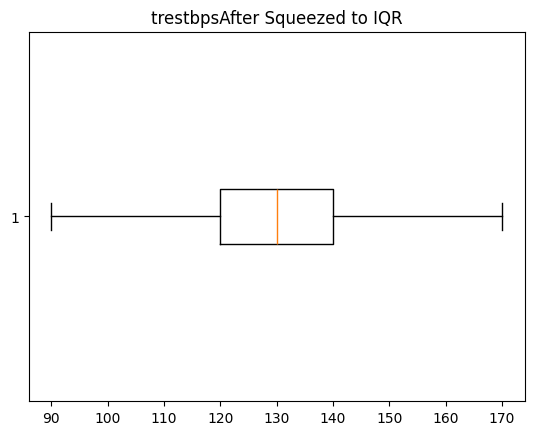

C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mean(), inplace=True)


--------------------------------------------------
--------------------------------------------------


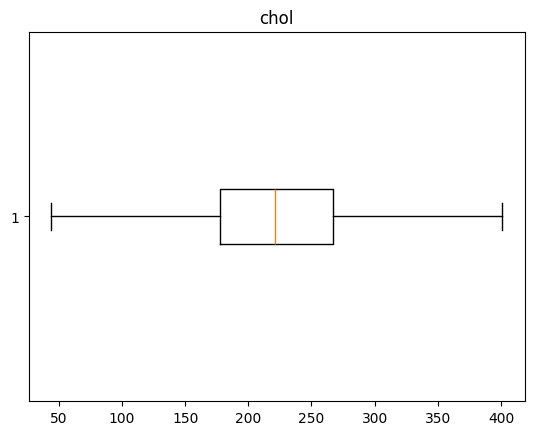

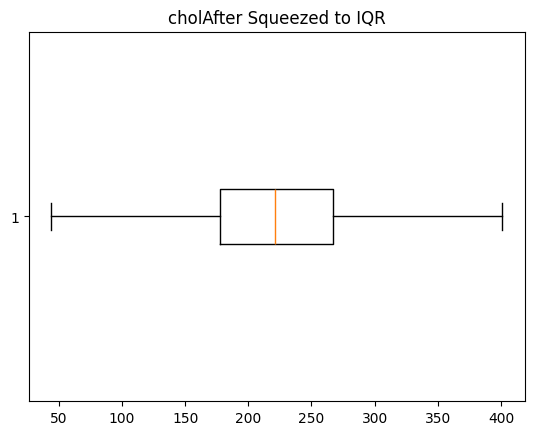

--------------------------------------------------
--------------------------------------------------


C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mean(), inplace=True)


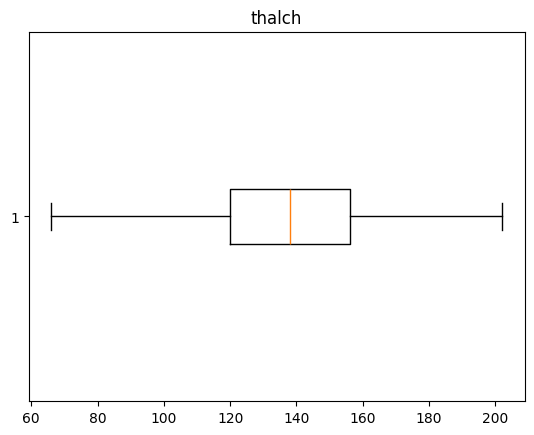

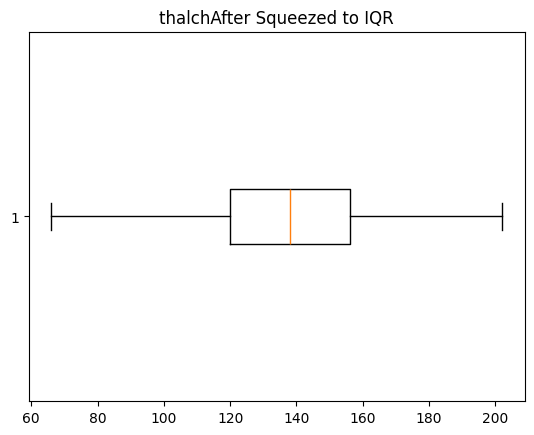

--------------------------------------------------
--------------------------------------------------


C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].mean(), inplace=True)


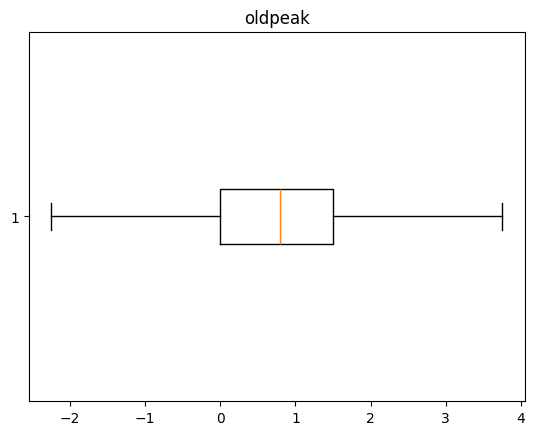

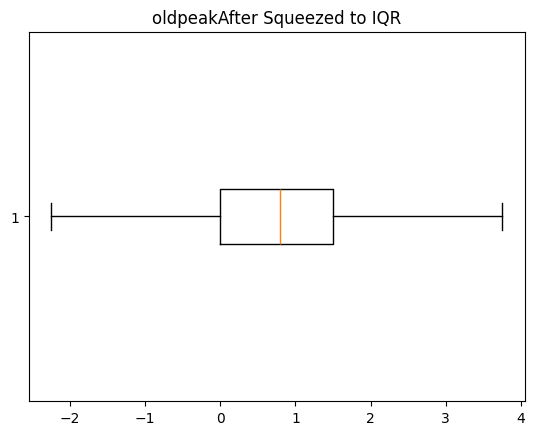

--------------------------------------------------
--------------------------------------------------


C:\Users\ataka\AppData\Local\Temp\ipykernel_15864\2768712617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=df[col].median(), inplace=True)


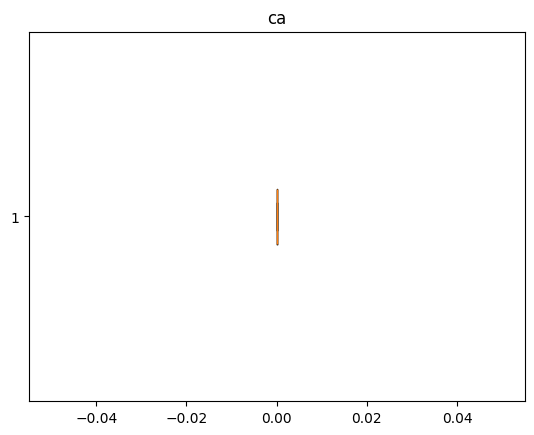

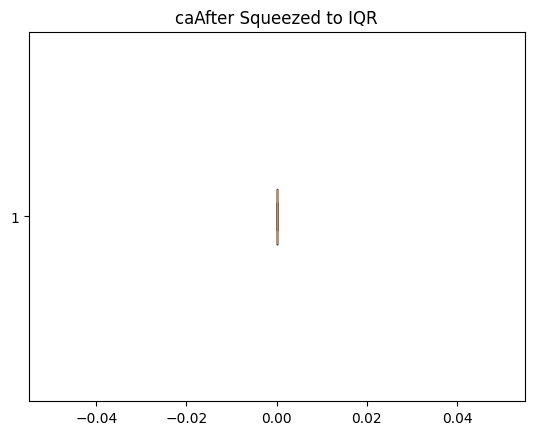

--------------------------------------------------


In [96]:
for col in int_columns:
    if col == 'ca':
        df[col].fillna(value=df[col].median(), inplace=True) 
        # ca damar sayisini belirttigi icin mean alirsak float veri tipinda damar sayisi mantiksiz olacagindan medyan ile doldurduk.
    else:
        df[col].fillna(value=df[col].mean(), inplace=True) 
        # diger sutunlar icin ortalama ile bos degerleri doldurdum.

    print(50*'-')
    # Aykiri degerleri gorsellestirmek icin kutu grafigi kullanalim
    data = df[col]
    plt.boxplot(x=data ,vert=False)
    plt.title(col)
    plt.show()

    # Aykiri degerleri inner bounda almak
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].apply(func=lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    # Aykiri degerleri iqr icine zorladiktan sonra gorsellestirmek icin kutu grafigi kullanalim
    data = df[col]
    plt.boxplot(x=data ,vert=False)
    plt.title(col + 'After Squeezed to IQR')
    plt.show()
    print(50*'-')

In [110]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'sex' and 'slope'
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # Apply on 'sex' column
df['slope'] = label_encoder.fit_transform(df['slope'])  # Apply on 'slope' column

# OneHotEncoding for selected columns
one_hot_encoded = pd.get_dummies(df[['dataset', 'cp', 'restecg', 'fbs', 'exang', 'thal']], drop_first=True)

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original categorical columns that were encoded
df.drop(['dataset', 'cp', 'restecg'], axis=1, inplace=True)

In [111]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,ca,...,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,fbs_True,exang_True,thal_normal,thal_reversable defect
0,63,1,145.0,233.0,True,150.0,False,2.3,0,0.0,...,False,False,False,True,False,False,True,False,False,False
1,67,1,160.0,286.0,False,108.0,True,1.5,1,0.0,...,False,False,False,False,False,False,False,True,True,False
2,67,1,120.0,229.0,False,129.0,True,2.6,1,0.0,...,False,False,False,False,False,False,False,True,False,True
3,37,1,130.0,250.0,False,187.0,False,3.5,0,0.0,...,False,False,True,False,True,False,False,False,True,False
4,41,0,130.0,204.0,False,172.0,False,1.4,2,0.0,...,False,True,False,False,False,False,False,False,True,False


In [113]:
df.to_csv('processed_data.csv')